In [42]:
import numpy as np 
import random 
import scipy as sp 
from pandas import Series,DataFrame 
import pandas as pd 
import time 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import sklearn 

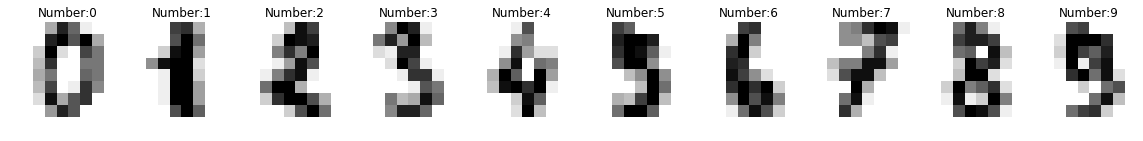

In [43]:
from sklearn.datasets import load_digits 

digits = load_digits()

plt.figure(figsize = (20,5))

for label, img in zip(digits.target[:10],digits.images[:10]):
    plt.subplot(1,10,label+1)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Number:{0}'.format(label))

In [44]:
from sklearn.model_selection import train_test_split

#混同行列
from sklearn.metrics import confusion_matrix 

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression 

#SVM 
from sklearn.svm import LinearSVC

#決定木
from sklearn.tree import DecisionTreeClassifier

#k-NN 
from sklearn.neighbors import KNeighborsClassifier 

#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier 



In [45]:
X=digits.data

y=digits.target

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [47]:
print('train:',pd.DataFrame(y_train,columns=['label']).groupby('label')['label'].count())

train: label
0    141
1    139
2    133
3    138
4    143
5    134
6    129
7    131
8    126
9    133
Name: label, dtype: int64


trainデータに偏りなさそう

In [48]:
print('test:',pd.DataFrame(y_test,columns=['label']).groupby('label')['label'].count())

test: label
0    37
1    43
2    44
3    45
4    38
5    48
6    52
7    48
8    48
9    47
Name: label, dtype: int64


testデータにも偏りなさそう

In [49]:
for model in [LogisticRegression(),LinearSVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=3),RandomForestClassifier()]:
    fit_model = model.fit(X_train,y_train)
    pred_y = fit_model.predict(X_test)
    print(type(y_test))
    print(type(pred_y))
    confusion_matrix = confusion_matrix(y_test,pred_y)
    print('confusion_matrix:')
    print(confusion_matrix)
    
    print(fit_model.score(X_train,y_train))
    print(fit_model.score(X_test,y_test))
    print('\n')

C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]
0.9962880475129918
0.9533333333333334


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


TypeError: 'numpy.ndarray' object is not callable